## Machine Learning, Spring 2023: Project 1

### KAMAL SUBEDI (G35111003) 


#### 1) Dataset 1 : https://www.kaggle.com/uciml/pima-indians-diabetes-database

Platform: Jupyter Notebook

Device: MacOS M2

Programming language: Python3, Python libraries





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import time

In [2]:
#load data
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
y = data[["Outcome"]]

In [4]:
x = data.drop("Outcome", axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

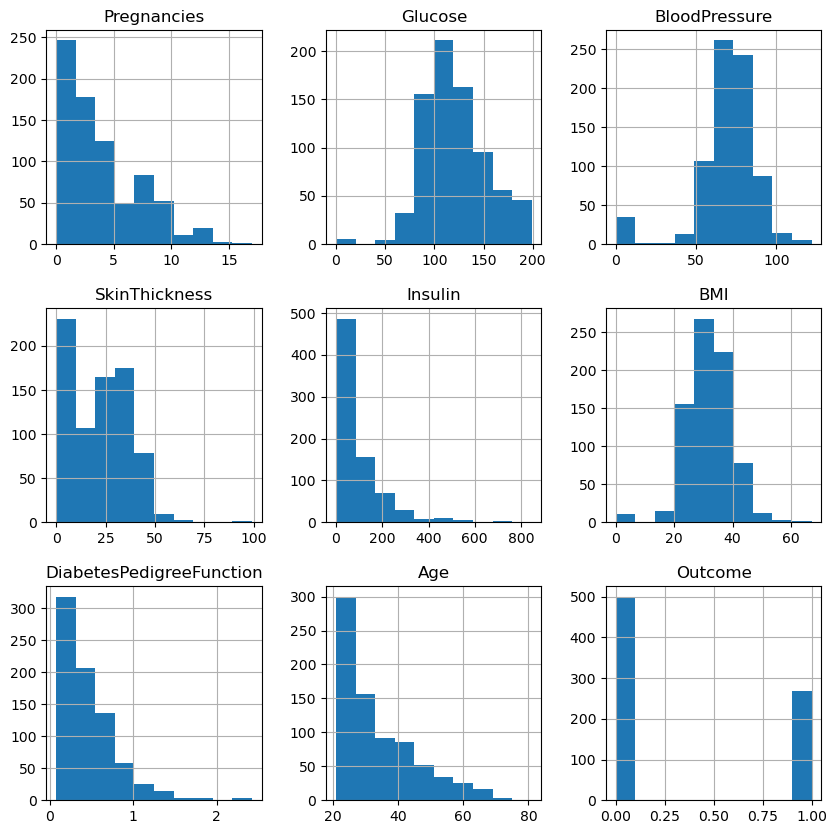

In [6]:
# plot histograms of each feature
data.hist(figsize=(10,10))
plt.show()

In [7]:
#let's find which features should we keep and which are needed to drop.
# Finding correlation for Feature selection 
reln=data.corr()
reln

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


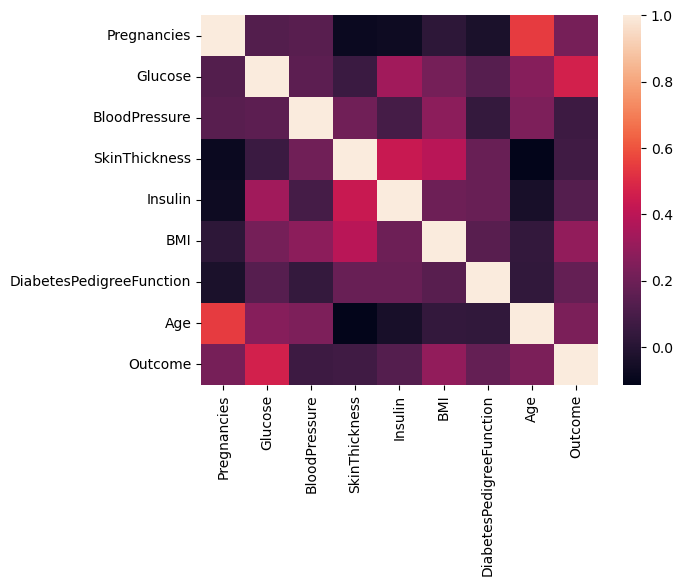

In [8]:
sns.heatmap(reln);

In [9]:
X_train = X_train[["Glucose", "BMI"]]
X_train

,Glucose,BMI
60,84,0.0
618,112,28.2
346,139,28.7
294,161,21.9
231,134,46.2
...,...,...
71,139,28.6
106,96,22.4
270,101,45.6
435,141,42.4


In [10]:
X_train.sample()

,Glucose,BMI
15,100,30.0


In [11]:
X_train.isnull().sum()

Glucose    0
BMI        0
dtype: int64

In [12]:
X_train.shape,X_test.shape

((614, 2), (154, 8))

In [13]:
X_train.describe()

,Glucose,BMI
count,614.000000,614.000000
mean,120.855049,31.983388
std,32.035057,7.740625
min,0.000000,0.000000
25%,100.000000,27.100000
50%,117.000000,32.000000
75%,139.000000,36.375000
max,199.000000,67.100000


#Here, we can see that Glucose and BMI highly influence the target variable. So, we are choosing these variables as feature variable and dropping other independent variables.

In [14]:
#Find a euclidean distance
def euclidean_dist(vec1, vec2):
    return math.dist(vec1,vec2)

In [15]:
#Find a manhattan distance
def manhattan_dist(vec1, vec2):
    distance = 0
    for p_i,q_i in zip(vec1, vec2):
        distance += abs(p_i - q_i)
    return distance

In [16]:
X_train.loc[0]


Glucose    148.0
BMI         33.6
Name: 0, dtype: float64

In [17]:
X_train.loc[1]

Glucose    85.0
BMI        26.6
Name: 1, dtype: float64

In [18]:
manhattan_dist(X_train.loc[0],X_train.loc[1])

70.0

In [19]:
euclidean_dist(X_train.loc[0],X_train.loc[1])

63.387695966961914

In [20]:
start = time.process_time()
def KNNPredict(X_test, X_train, y_train,k):
    X_test = X_test[["Glucose", "BMI"]]
    predictions = []
    
    for i in range(0,len(X_test)):
        sample = X_test.iloc[i]
        euclidean_arr = []
        manhattan_arr = []
        
        for j in range(0,len(X_train)):
            training_sample = X_train.iloc[j]
            outcome = y_train.iloc[j]
            dist = euclidean_dist(sample, training_sample)
            euclidean_arr.append((dist, training_sample,outcome))
            man_dist = manhattan_dist(sample, training_sample)
            manhattan_arr.append(man_dist)
            ##result=pd.DataFrame(e)
            ##result
       
        y_pred=sorted(euclidean_arr, key = lambda x:x[0])[:k]
        oneCounter = 0
        zeroCounter = 0
        for item in y_pred:
            if item[2].values[0] == 0:
                zeroCounter +=1
            else:
                oneCounter += 1
        if zeroCounter > oneCounter:
            prediction = 0
        else:
            prediction = 1
        predictions.append(prediction)      
        #k_smallest element in the array according to their distance
        #take the average of outcomes of the smallest k element
        #prediction = 0
        #predictions.append(prediction)
    return predictions
    return manhattan_arr
    #return predictions
    
end = time.process_time()
print("Time elapsed for the algorithm:", end - start)

Time elapsed for the algorithm: 0.0005100000000002325


In [21]:
predictions = KNNPredict(X_test, X_train, y_train,k=5)
predictions

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [22]:
test=pd.DataFrame(predictions)
test

,0
0,0
1,0
2,1
3,0
4,0
...,...
149,1
150,0
151,0
152,0


In [23]:
result=pd.DataFrame(predictions)
result

,0
0,0
1,0
2,1
3,0
4,0
...,...
149,1
150,0
151,0
152,0


In [24]:
result['Glucose'] = data['Glucose']
result['BMI'] = data['BMI']
result['Diabetes']=data["Outcome"]
result

,0,Glucose,BMI,Diabetes
0,0,148,33.6,1
1,0,85,26.6,0
2,1,183,23.3,1
3,0,89,28.1,0
4,0,137,43.1,1
...,...,...,...,...
149,1,90,27.3,0
150,0,136,37.4,0
151,0,114,21.9,0
152,0,156,34.3,1


In [25]:
result=result[["Diabetes"]]
result

,Diabetes
0,1
1,0
2,1
3,0
4,1
...,...
149,0
150,0
151,0
152,1


In [26]:
k=result[["Diabetes"]]
k

,Diabetes
0,1
1,0
2,1
3,0
4,1
...,...
149,0
150,0
151,0
152,1


In [27]:
#Print the most common prediction 
n_nonzero=np.count_nonzero(k)
n_zero=k.size - np.count_nonzero(k)
if(n_nonzero>n_zero):
    print(1)
else: 
    print(0)

0


In [28]:
#Here, we can see that the output is 0 which means that person has a diabetes. 

In [29]:
#Find the accuracy of our algorithm. 
from sklearn.metrics import accuracy_score
print ('Accuracy of the classifier is', accuracy_score(y_test, predictions)*100, '%')

Accuracy of the classifier is 74.02597402597402 %


In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[82 17]
 [23 32]]

True Positives(TP) =  82

True Negatives(TN) =  32

False Positives(FP) =  17

False Negatives(FN) =  23


Text(0.5, 23.52222222222222, 'Predicted label')

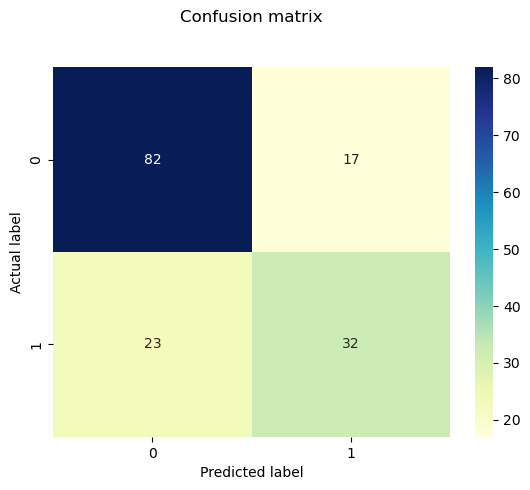

In [31]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
score = []
for k in range (1,10):
    y_pred=KNNPredict(X_test, X_train, y_train,k)
    accuracy = accuracy_score(y_pred, y_test)
    score.append(accuracy)
    print(accuracy)

0.6818181818181818
0.6493506493506493
0.7142857142857143
0.7142857142857143
0.7402597402597403
0.7272727272727273
0.7402597402597403
0.7337662337662337
0.7142857142857143


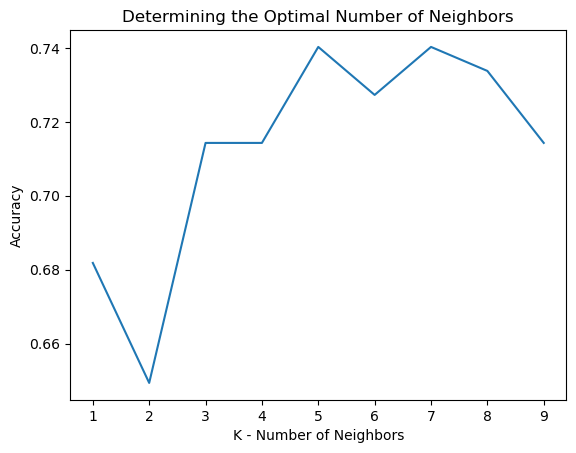

In [33]:
plt.plot(range(1,10), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()